# The task

We have oil samples in three regions: in each of 10,000 fields, where the quality of oil and the volume of its reserves were measured. We need to build a machine learning model that will help determine the region where mining will bring the most profit. Analyze potential rewards and risks with * Bootstrap. *

* id — unique identifier of well;
* f0, f1, f2 — three signs of dots;
* product — well reserves (thousand barrels).

<a name="1common."></a>
## <a name="0.0"></a>Table of contents:
* [Step 1. Load the data and prepare for their analysis](#1.)
* [Step 2. Building and testing a model](#2.)
* [Step 3. Preparation for calculating profit](#3.)
    
* [Step 4. Calculation of profit and risk](#4.)     
     


<a name="1."></a><br/>
<font size="5"><b>1. Load the data and prepare for their analysis</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


In [2]:
data_0 = pd.read_csv('datasets/geo_data_0.csv')
data_1 = pd.read_csv('datasets/geo_data_1.csv')
data_2 = pd.read_csv('datasets/geo_data_2.csv')

In [3]:
data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [4]:
data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [5]:
data_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


In [6]:
print(data_0.duplicated().sum(), data_1.duplicated().sum(), data_2.duplicated().sum())

0 0 0


In [7]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [9]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> The data were loaded. Datasets consist of 4 columns and 100,000 rows. There are no complete duplicates or gaps. Good quality data. </div>


Slope: 6.59
Intercept: 76.00


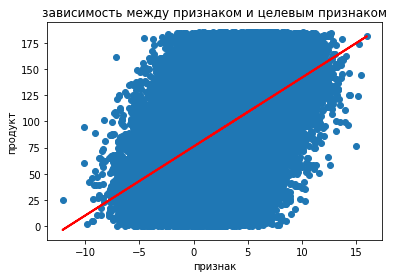

In [10]:
#let's see if there is a direct relationship between the features and the target features
def heatmap(data, title):
    cols = ['f0', 'f1', 'f2', 'product']
    plt.figure(figsize=(6, 6))
    hm = sns.heatmap(data[cols].corr(), cbar=True, annot=True)
    plt.title(title)
    plt.show();
    

def linear_regression(data, title, xlabel, ylabel):
    X = data[['f2']].values
    y = data['product'].values
    slr = LinearRegression()
    slr.fit(X, y)
    y_pred = slr.predict(X)
    print('Slope: {:.2f}'.format(slr.coef_[0]))
    print('Intercept: {:.2f}'.format(slr.intercept_))
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red', linewidth=2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel);

linear_regression(data_0,'relationship between the features and the target features', 'feature', 'product')

Slope: 26.95
Intercept: 1.59


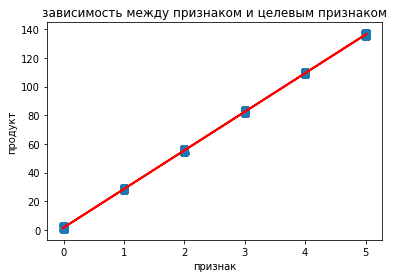

In [11]:
linear_regression(data_1,'relationship between the features and the target features', 'feature', 'product')

Slope: 5.74
Intercept: 80.67


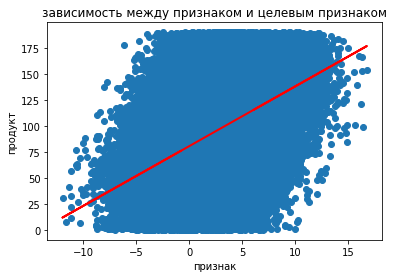

In [12]:
linear_regression(data_2,'relationship between the features and the target features', 'feature', 'product')

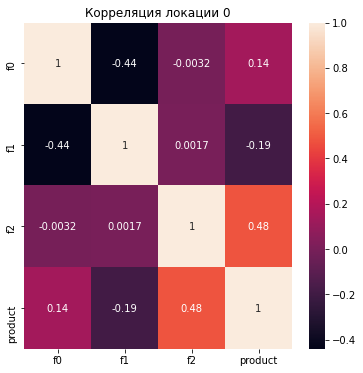

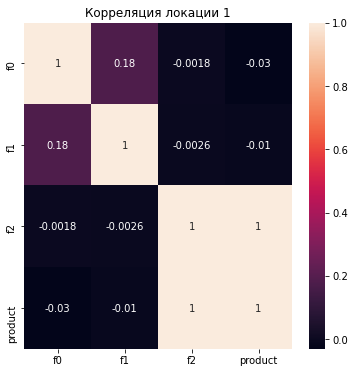

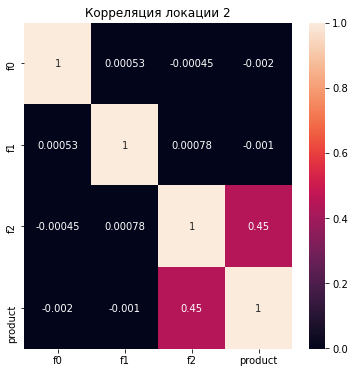

In [13]:
heatmap(data_0, 'Correlation of location 0')
heatmap(data_1, 'Correlation of location 1')
heatmap(data_2, 'Correlation of location 2')

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> The graphs clearly show that only data from dataset # 1 has a direct relationship between the feature and the target feature. It can be assumed that this is the most promising option..</div>

In [14]:
#combine all the tables to build a histogram and see the volume of oil production by location
data_0['location'] = 'Location_0'
data_1['location'] = 'Location_1'
data_2['location'] = 'Location_2'
data = data_0.append(data_1.append(data_2))

Text(0, 0.5, 'число значений')

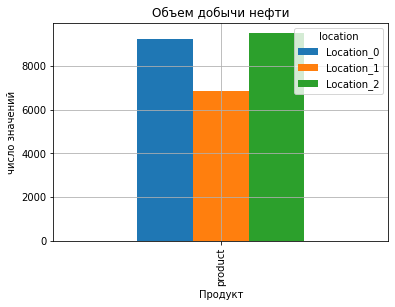

In [15]:
#for clarity, divide the data by 1000
data['product'] = data['product'] / 1000
test = data.pivot_table(columns='location', values='product', aggfunc='sum')

test.plot(kind='bar', title = 'Oil production', grid = True);
plt.xlabel('Product')
plt.ylabel('number of values')

In [16]:
#return our datasets to their original form.
data_0 = data_0.drop(['location'], axis = 1)
data_1 = data_1.drop(['location'], axis = 1)
data_2 = data_2.drop(['location'], axis = 1)

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> 
Judging by the graph, the largest oil reserves are in geolocation 2, location 0 is slightly behind and in third place is location 1</div>

<a name="1."></a><br/>
<font size="5"><b>2. Building and testing a model</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

In [17]:
# select the features and the target feature
features_0=data_0.drop(['id', 'product'], axis = 1)
target_0 = data_0['product']

features_1=data_1.drop(['id', 'product'], axis = 1)
target_1 = data_1['product']

features_2=data_2.drop(['id', 'product'], axis = 1)
target_2 = data_2['product']


In [18]:
#divide the data into training and validation samples
state = np.random.RandomState(90)

features_train_0, features_valid_0, target_train_0, target_valid_0 = train_test_split(
    features_0, target_0, test_size = 0.25, random_state = state)

features_train_1, features_valid_1, target_train_1, target_valid_1 = train_test_split(
    features_1, target_1, test_size = 0.25, random_state = state)

features_train_2, features_valid_2, target_train_2, target_valid_2 = train_test_split(
    features_2, target_2, test_size = 0.25, random_state = state)

print('Локация 0')
print('Training sample', features_train_0.shape)
print('Training sample', target_train_0.shape)
print('Validation sample', features_valid_0.shape)
print('Validation sample', target_valid_0.shape)

Локация 0
Обучающая выборка (75000, 3)
Обучающая выборка (75000,)
Валидационная выборка (25000, 3)
Валидационная выборка (25000,)


In [19]:
print('Локация 1')
print('Training sample', features_train_1.shape)
print('Training sample', target_train_1.shape)
print('Validation sample', features_valid_1.shape)
print('Validation sample', target_valid_1.shape)

Локация 1
Обучающая выборка (75000, 3)
Обучающая выборка (75000,)
Валидационная выборка (25000, 3)
Валидационная выборка (25000,)


In [20]:
print('Локация 2')
print('Training sample', features_train_2.shape)
print('Training sample', target_train_2.shape)
print('Validation sample', features_valid_2.shape)
print('Validation sample', target_valid_2.shape)

Локация 2
Обучающая выборка (75000, 3)
Обучающая выборка (75000,)
Валидационная выборка (25000, 3)
Валидационная выборка (25000,)


In [21]:
# train a linear regression model for each geolocation
# I think that it is not advisable to write a function here, because in the future we will need the "Predictions" variables
# and "Correct answers" for each location separately

model_0 = LinearRegression()
model_0.fit(features_train_0, target_train_0)
predictions_valid_0 = model_0.predict(features_valid_0)
answers_0 = target_valid_0.values

print('Predictions:',predictions_valid_0)
print()
print('Correct answers:', answers_0)
print()

Предсказания: [104.8306061  144.75874428  88.20186742 ... 101.34276797  71.38978955
  99.14502195]

Правильные ответы: [ 57.37748491 149.98170078  82.63718437 ... 175.57222627  85.67667703
 109.25399389]



In [22]:
model_1 = LinearRegression()
model_1.fit(features_train_1, target_train_1)
predictions_valid_1 = model_1.predict(features_valid_1)
answers_1 = target_valid_1.values

print('Predictions:',predictions_valid_1)
print()
print('Correct answers:', answers_1)
print()

Предсказания: [135.40259651  83.14188131   2.16768219 ...  82.11295612  29.89628997
  82.29103059]

Правильные ответы: [134.76630516  84.03888568   3.17910258 ...  80.85978309  30.13236361
  84.03888568]



In [23]:
model_2 = LinearRegression()
model_2.fit(features_train_2, target_train_2)
predictions_valid_2 = model_2.predict(features_valid_2)
answers_2 = target_valid_2.values

print('Predictions:',predictions_valid_2)
print()
print('Correct answers:', answers_2)
print()

Предсказания: [125.35738807  76.86594676  67.50330116 ... 130.72363748 105.84011074
 122.41772307]

Правильные ответы: [136.7199655   45.32749417  57.91597659 ... 124.26888601  77.0784483
  56.59582047]



In [24]:
#calculate the RMSE of the models using cross_val_score
def cross_score(model, features, target):
    cross = cross_val_score(model, features, target, cv=4, scoring='neg_mean_squared_error')
    final_score = cross.sum()/len(cross)
    final_score=(-final_score)
    final_score=final_score**0.5
    return final_score
    
print('RMSE model_0:', cross_score(model_0, features_0, target_0)) 
print('RMSE model_1:', cross_score(model_1, features_1, target_1))
print('RMSE model_2:', cross_score(model_2, features_2, target_2)) 

RMSE модели_0: 37.6944197744771
RMSE модели_1: 0.8904251770787283
RMSE модели_2: 40.056773105192946


In [25]:
#check the RMSE value in another way
print('RMSE model_0:',(mean_squared_error(target_valid_0,predictions_valid_0 ))**0.5)
print('RMSE model_1:',(mean_squared_error(target_valid_1,predictions_valid_1 ))**0.5)
print('RMSE model_2:',(mean_squared_error(target_valid_2,predictions_valid_2 ))**0.5)

RMSE модели_0: 37.78439328352742
RMSE модели_1: 0.889135553827425
RMSE модели_2: 40.07883280673756


In [26]:
predictions_valid_0_mean=pd.Series(predictions_valid_0).mean()
print('Average stock of predicted raw materials of model_0: {:.2f}' .format(predictions_valid_0_mean), 'thousand barrels')
predictions_valid_1_mean=pd.Series(predictions_valid_1).mean()
print('Average stock of predicted raw materials of model_1: {:.2f}' .format(predictions_valid_1_mean),'thousand barrels')
predictions_valid_2_mean=pd.Series(predictions_valid_2).mean()
print('Average stock of predicted raw materials of model_2: {:.2f}' .format(predictions_valid_2_mean), 'thousand barrels')


Cредний запас предсказанного сырья модели_0: 92.47 тыс. баррелей
Cредний запас предсказанного сырья модели_1: 68.66 тыс. баррелей
Cредний запас предсказанного сырья модели_2: 95.21 тыс. баррелей


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> We trained the model, displayed the predictions and correct answers for the validation set (25% of our data). Even with the naked eye, you can see that the values ​​of the predictions and correct answers of the model for location 1 are very similar. Which is to be expected when recalling our dependence and correlation graph. We calculated the RMSE value for each location in two ways. The lower the RMSE value, the better. The value of the model from location 1 confirms all of the above. However, the average stock of predicted raw materials at location 1 is the smallest, but it must be borne in mind that so far this particular location wins in quality. Perhaps the data from locations 0 and 2 is very different from reality, given the RMSE metric (mean deviation (error))</div>

<a name="1."></a><br/>
<font size="5"><b>3. Preparation for calculating profit</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

In [27]:
budjet = 10000000000
income_barrel = 450000
research = 500
best = 200

#Let's calculate the minimum volume of oil that must be in each well for its liquidity
print('The minimum amount of oil that must be in the well for liquidity',round(budjet / 200 / 450000),'barrels')

def cal_profit(data, geo):
    # Let's calculate the profit of each well
    data['income'] = data['product'] * 450000

    # We divide the Budget by the number of wells -> we will get the minimum amount that we need to get from one well
    data['profitable'] = np.where(data['income'] > budjet / 100000, 1, 0)
    print('Illiquid wells in the location', geo,  data.query('profitable == 0')['profitable'].value_counts()[0])
    print('Liquid wells in the location', geo, data.query('profitable == 1')['profitable'].value_counts()[1])

Минимальное количество нефти, которое должно быть в скважине для ликвидности 111 бареля


In [28]:
cal_profit(data_0, '0')

Неликвидных скважин в локации 0 46
Ликвидных скважин в локации 0 99954


In [29]:
cal_profit(data_1, '1')

Неликвидных скважин в локации 1 8235
Ликвидных скважин в локации 1 91765


In [30]:
cal_profit(data_2, '2')

Неликвидных скважин в локации 2 53
Ликвидных скважин в локации 2 99947


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> We calculated the minimum oil reserve for a well, taking into account the conditions of the problem (200 wells of the same geolocation, budget 10 billion dollars). It turns out that all locations satisfy the condition. The average well stock is over 111 barrels. Profit was calculated for each well and added to an additional column. 1 - a sinkhole will bring more profit than the spent budget for development (> 10 trillion rubles), 0 - a sinkhole will be unprofitable). It turns out that there are more unprofitable wells in location 1, but this is not bad. Because the company as a whole only designs the top 200. </div>

<a name="1."></a><br/>
<font size="5"><b> 4. Calculation of profit and risk</b></font>.<br/>
[<font size="2">(to table of contents)</font>](#1common.)

In [31]:
#Profit calculation function
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending = False)
    selected = target[probs_sorted.index][:count]
    return 450000*selected.sum()-10000000000


In [32]:
def profit(answers, probabs):
    target = pd.Series(answers)
    probs = pd.Series(probabs)
    values = []
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state = state)
        probs_subsample = probs[target_subsample.index]
        res = revenue(target_subsample, probs_subsample, 200)
        values.append(res)

    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    print('Lower limit of the confidence interval: {:.3f}' .format(lower/10000000000), 'billion dollars')
    print('The upper limit of the confidence interval: {:.3f}' .format(upper/10000000000), 'billion dollars')
    print()
    print('Average profit from geolocation: {:.3f}' .format(values.mean()/10000000000), 'billion dollars')
    print('Risk of loss {0:.1%}'.format(len(values[values < 0])/len(values)))
   
profit(answers_0, predictions_valid_0)

Нижняя граница доверительного интервала: -0.017 млд.рублей
Верхняя граница доверительного интервала: 0.089 млд.рублей

Cредняя прибыль с геолокации: 0.037 млд.рублей
Риск убытков 7.5%


In [33]:
profit(answers_1, predictions_valid_1)

Нижняя граница доверительного интервала: 0.007 млд.рублей
Верхняя граница доверительного интервала: 0.091 млд.рублей

Cредняя прибыль с геолокации: 0.048 млд.рублей
Риск убытков 1.3%


In [34]:
profit(answers_2, predictions_valid_2)

Нижняя граница доверительного интервала: -0.021 млд.рублей
Верхняя граница доверительного интервала: 0.091 млд.рублей

Cредняя прибыль с геолокации: 0.037 млд.рублей
Риск убытков 10.0%


<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>Conclusion:</b> 
The average profit for all three locations is approximately the same, but the greatest risk of loss is present in locations 0 and 2</div>

<div class="alert alert-info" style="border:solid blue 2px; padding: 20px"> <b>General conclusion:</b> After analyzing the entire study, you can safely make a choice in favor of developing wells at location 1. The model, based on data from location 1, gives fairly clear predictions (RMSE is minimal). There are fewer liquid wells than in other locations, but considering that you need to take the best 200, the location is suitable. (the number of liquid wells is 91765). Average profit, insignificantly, but more than the rest. The risk of loss is minimal. The model has passed the break-even test. The same cannot be said about locations 0 and 2.</div>